In [1]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
import json
from firebase import firebase
from firebase_admin import credentials, initialize_app, storage,firestore
# Init firebase with your credentials
cred = credentials.Certificate(r"serviceAccountKey.json")
initialize_app(cred, {'storageBucket': 'stock-data-fc41e.appspot.com'})
firebase = firebase.FirebaseApplication('https://stock-data-fc41e-default-rtdb.firebaseio.com/', None)
%matplotlib inline

In [2]:
result = firebase.get('/Analysis/', '')
data = json.dumps(result)
resp = json.loads(data)
finalz=resp['ed']
finaly=resp['em']
finalx=resp['ey']
finalr=resp['sd']
finalq=resp['sm']
finalp=resp['sy']
x=int(finalx)
y=int(finaly)
z=int(finalz)
p=int(finalp)
q=int(finalq)
r=int(finalr)

In [3]:
start= datetime.datetime(p,q,r)
end= datetime.datetime(x,y,z)

In [6]:
result = firebase.get('/Stocks/', '')
data = json.dumps(result)
resp = json.loads(data)
finalb=resp['s1']
finalc=resp['s2']
finald=resp['s3']



^BSESN
^NSEI


In [7]:
tesla=web.DataReader(finalb,'yahoo',start,end)
ford=web.DataReader(finalc,'yahoo',start,end)
gm=web.DataReader(finald,'yahoo',start,end)

In [8]:
tesla.to_csv('TeslaStock_up.csv')
ford.to_csv('FordStock_up.csv')
gm.to_csv('GMStock_up.csv')

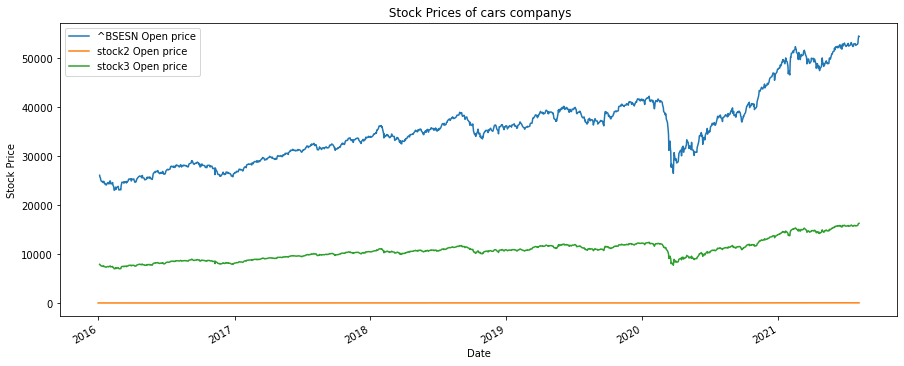

In [15]:
#open prices

tesla['Open'].plot(label=finalb +' Open price',figsize=(15,6))
gm['Open'].plot(label=finalc+'Open price')
ford['Open'].plot(label=finald+'stock3 Open price')
plt.title(' Stock Prices of companys')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig("graphopenprice.jpg")

In [ ]:

# Init firebase with your credentials
cred = credentials.Certificate(r"serviceAccountKey.json")
initialize_app(cred, {'storageBucket': 'stock-data-fc41e.appspot.com'})

In [ ]:

# Put your local file path 
fileName = r"graphopenprice.jpg"
bucket = storage.bucket()
blob = bucket.blob("graphopenprice")
blob.upload_from_filename(fileName)

# Opt : if you want to make public access from the URL
blob.make_public()
print("your file url", blob.public_url)
db = firestore.client()
doc_ref = db.collection(u'stock').document(u'data')
doc_ref.set({
     u'img-link': blob.public_url,
})


In [ ]:
#volume traded &interpretations
tesla['Volume'].plot(label="Tesla",figsize=(10,7))
ford['Volume'].plot(label="Ford")
gm['Volume'].plot(label="Tesla")
plt.legend()
plt.savefig("volume_traded.jpg")

In [ ]:

# Put your local file path 
fileName = r"volume_traded.jpg"
bucket = storage.bucket()
blob = bucket.blob("graphopenprice")
blob.upload_from_filename(fileName)

# Opt : if you want to make public access from the URL
blob.make_public()

print("your file url", blob.public_url)

In [ ]:
#as we see a large decline in around december 2013 in ford
ford.iloc[[ford['Open'].argmin()]]

In [ ]:
#market cap(total money traded not actual but calculative)
tesla['Total traded']=tesla['Open']*tesla['Volume']
ford['Total traded']=ford['Open']*ford['Volume']
gm['Total traded']=gm['Open']*gm['Volume']

In [ ]:
tesla['Total traded'].plot(label='Tesla',figsize=(15,15))
ford['Total traded'].plot(label='Ford ')
gm['Total traded'].plot(label='Gm ')
plt.legend()
plt.ylabel
plt.savefig("totaltraded.jpg")

In [ ]:

# Put your local file path 
fileName = r"totaltraded.jpg"
bucket = storage.bucket()
blob = bucket.blob("totaltraded")
blob.upload_from_filename(fileName)

# Opt : if you want to make public access from the URL
blob.make_public()

print("your file url", blob.public_url)

In [ ]:
#moving average(to make data more reliable as the data in gm has a lot of up and down)
gm['Open'].plot(label='no moving average',figsize=(15,7))
gm['MA50']=gm['Open'].rolling(50).mean()#moving average
gm['MA50'].plot(label='MA50')
gm['MA200']=gm['Open'].rolling(200).mean()#moving average
gm['MA200'].plot(label='MA200')#when to high that is ma=200 then the up's and down's can't detect
plt.legend()#we can use auto regression function for correcting these
plt.savefig("movingavg.jpg")

In [ ]:
from firebase_admin import credentials, initialize_app, storage
# Put your local file path 
fileName = r"movingavg.jpg"
bucket = storage.bucket()
blob = bucket.blob("movingavg")
blob.upload_from_filename(fileName)

# Opt : if you want to make public access from the URL
blob.make_public()

print("your file url", blob.public_url)

In [ ]:
#correlation & Scatter matrix
from pandas.plotting import scatter_matrix
import pandas as pd

In [ ]:
car_comp=pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)
car_comp.columns=['Tesla Open', 'Gm Open', 'Ford Open']

In [ ]:
scatter_matrix(car_comp,figsize=(8,8),hist_kwds={'bins':50})#32,23 they are correlated as are almost straight line ford and gm but not in the case of tesla


In [ ]:
# #using candlestick chart(financial chart)
# from mpl_finance import candlestick_ohlc
# import datetime
# import warnings

# from matplotlib.dates import DateFormatter, date2num, WeekdayLocatoray, DayLocator , MONDAY

# ford_reset=ford.loc['2012-01':'2013-01'].reset_index()
# ford_reset['data_ax']=ford_reset['Date'].apply(lambda date:date2num(date))
# ford_values=[tuple(vals)for vals in ford_reset[['date_ax','Open','High','Low','CLose']]]
# mondays=WeekdayLocator(MONDAY)
# alldays=DayLocator()
# weekFormatter=DateFormatter('%b %d')
# dayFormatter= DateFormatter('%%d')
# fig,ax=plt.subplots()
# candlestick_ohlc(ax,ford_values,width=0.6,colorup='g',colordown='r')

In [ ]:
#Daily Percentage change#helps to invest on dialy basis
tesla['returns']=(tesla['Close']/tesla['Close'].shift(1))-1
ford['returns']=(ford['Close']/ford['Close'].shift(1))-1
gm['returns']=(gm['Close']/gm['Close'].shift(1))-1

In [ ]:
#Volatility(the higher the deviation high the variance )
ford['returns'].hist(bins=50)

In [ ]:
tesla['returns'].hist(bins=40,label='tesla',alpha=0.5,figsize=(18,6))#alpha for transerency
ford['returns'].hist(bins=40,label='ford',alpha=0.5)
gm['returns'].hist(bins=40,label='gm',alpha=0.5)

In [ ]:
#kde is probabilty density function
tesla['returns'].plot(kind='kde',label='tesla',figsize=(15,6))
ford['returns'].plot(kind='kde',label='ford')
gm['returns'].plot(kind='kde',label='gm')

In [ ]:
box_df=pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns=['testla','gm','fm']
box_df.plot(kind='box',figsize=(15,8))

In [ ]:
scatter_matrix(box_df,figsize=(8,8),hist_kwds={'bins':50},alpha=0.15)

In [ ]:
#cumulative return (for checking over a period returns instead of dialy)i(t)=(1+r(t))i(t-1)=(1+ (p(t)/p(t-1)) -1)i(t-1)=p(t)/p(t-1)*i(t-1)
tesla['Cummlative']=(1+tesla['returns']).cumprod()
ford['Cummlative']=(1+ford['returns']).cumprod()
gm['Cummlative']=(1+gm['returns']).cumprod()

In [ ]:
tesla.head()

In [ ]:
tesla['Cummlative'].plot(label='tesla',figsize=(15,7))
ford['Cummlative'].plot(label='ford')
gm['Cummlative'].plot(label='gm')
plt.title("cummulative return vs time")
plt.legend()